<a href="https://colab.research.google.com/github/kfl15/LSTM_RNN/blob/main/Yelp_Review_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Review Classifier


In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.11.0


## Downloading the TensorFlow `yelp_popularity_review` dataset


In [2]:
##load the yelp reviews dataset
data, info = tfds.load("yelp_polarity_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteGRKW1Z/yelp_polarity_reviews-train.t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0.incompleteGRKW1Z/yelp_polarity_reviews-test.tf…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


In [6]:
info

tfds.core.DatasetInfo(
    name='yelp_polarity_reviews',
    full_name='yelp_polarity_reviews/0.2.0',
    description="""
    Large Yelp Review Dataset.
    This is a dataset for binary sentiment classification. We provide a set of 560,000 highly polar yelp reviews for training, and 38,000 for testing. 
    ORIGIN
    The Yelp reviews dataset consists of reviews from Yelp. It is extracted
    from the Yelp Dataset Challenge 2015 data. For more information, please
    refer to http://www.yelp.com/dataset
    
    The Yelp reviews polarity dataset is constructed by
    Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset.
    It is first used as a text classification benchmark in the following paper:
    Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks
    for Text Classification. Advances in Neural Information Processing Systems 28
    (NIPS 2015).
    
    
    DESCRIPTION
    
    The Yelp reviews polarity dataset is constructed by considering stars 1 an

In [3]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [4]:
for sent, label in train_data:
    train_sentences.append(str(sent.numpy().decode('utf8')))
    train_labels.append(label.numpy())

for sent, label in test_data:
    test_sentences.append(str(sent.numpy().decode('utf8')))
    test_labels.append(label.numpy())


train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [7]:
##define the parameters for tokenizing and padding
vocab_size = 10000
embedding_dim = 64
max_length = 150
padding_type = 'post'
trunc_type='post'
oov_tok = "<OOV>"

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

##training sequences and labels
train_seqs = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_seqs,maxlen=max_length, truncating=trunc_type)

##testing sequences and labels
test_seqs = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seqs,maxlen=max_length)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 64)           640000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 150, 256)         197632    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,006,145
Trainable params: 1,006,145
No

In [14]:
num_epochs = 5
history = model.fit(
    train_padded, 
    train_labels, 
    epochs=num_epochs, 
    validation_data=(test_padded, test_labels)
    )

Epoch 1/5
17500/17500 [==============================] - 439s 25ms/step - loss: 0.1850 - accuracy: 0.9250 - val_loss: 0.1299 - val_accuracy: 0.9508
Epoch 2/5
17500/17500 [==============================] - 386s 22ms/step - loss: 0.1302 - accuracy: 0.9493 - val_loss: 0.1168 - val_accuracy: 0.9555
Epoch 3/5
17500/17500 [==============================] - 384s 22ms/step - loss: 0.1090 - accuracy: 0.9584 - val_loss: 0.1189 - val_accuracy: 0.9549
Epoch 4/5
17500/17500 [==============================] - 385s 22ms/step - loss: 0.0917 - accuracy: 0.9658 - val_loss: 0.1205 - val_accuracy: 0.9555
Epoch 5/5
17500/17500 [==============================] - 387s 22ms/step - loss: 0.0751 - accuracy: 0.9726 - val_loss: 0.1324 - val_accuracy: 0.9521


## Visualise the accuracy and loss

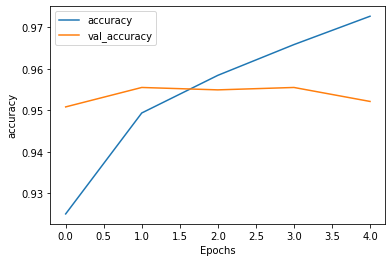

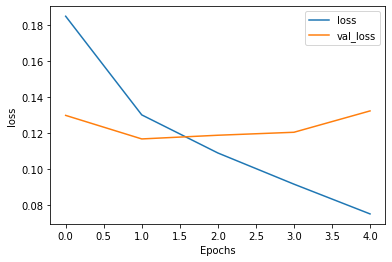

In [15]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classify new reviews

In [17]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 1s 1s/step
[[0.26834694]
 [0.3116984 ]]
